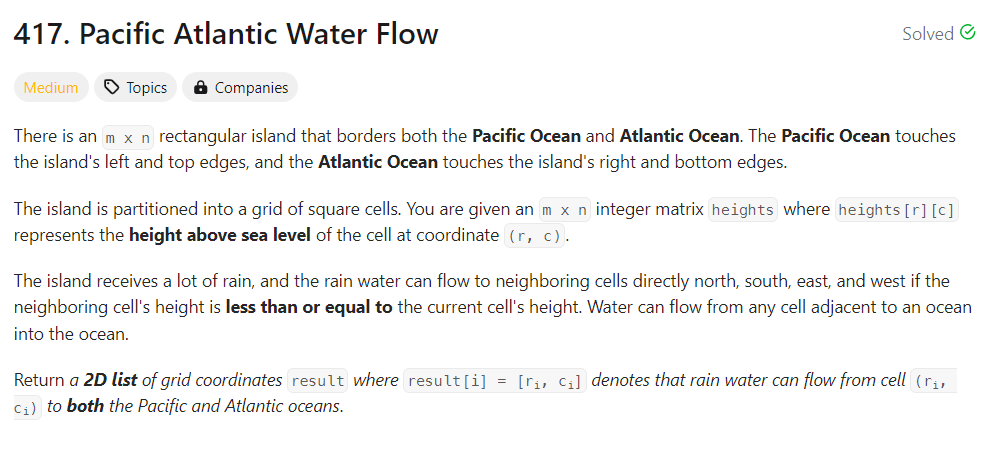

In [ ]:
# BFS Solution
# Time: O(MN) where the heights grid is MXN
# Memory: O(MN)

class Solution:
    def pacificAtlantic(self, heights: List[List[int]]) -> List[List[int]]:
        m, n = len(heights), len(heights[0])
        directions = [(1,0),(-1,0),(0,1),(0,-1)]
        boundaryCheck = lambda i,j: 0<=i<m and 0<=j<n

        # Pacific Ocean
        pacificSet = set([(i, 0) for i in range(m)] + [(0, j) for j in range(n)])
        queue = deque(pacificSet)
        while queue:
            for _ in range(len(queue)):
                i, j = queue.popleft()
                for di, dj in directions:
                    ni, nj = i+di, j+dj
                    if (ni, nj) not in pacificSet and  boundaryCheck(ni, nj) and heights[ni][nj] >= heights[i][j]:
                        pacificSet.add((ni, nj))
                        queue.append((ni, nj))

        # Atlantic Ocean
        atlanticSet = set([(i, n-1) for i in range(m)] + [(m-1, j) for j in range(n)])
        queue = deque(atlanticSet)
        while queue:
            for _ in range(len(queue)):
                i, j = queue.popleft()
                for di, dj in directions:
                    ni, nj = i+di, j+dj
                    if (ni, nj) not in atlanticSet and  boundaryCheck(ni, nj) and heights[ni][nj] >= heights[i][j]:
                        atlanticSet.add((ni, nj))
                        queue.append((ni, nj))
        
        return list(atlanticSet & pacificSet)

In [ ]:
# BFS Solution
# Time: O(MN) where the heights grid is MXN
# Memory: O(MN)

class Solution:
    def pacificAtlantic(self, heights: List[List[int]]) -> List[List[int]]:
        m, n = len(heights), len(heights[0])
        accessMap = [['' for j in range(n)] for i in range(m)]
        
        # Boundary Check fn
        boundaryCheck = lambda i, j: 0 <= i < m and 0 <= j < n
        # Directions that water can move
        directions = [(1, 0), (0, 1), (-1, 0), (0, -1)]

        # Access to Pacific
        bfs = deque([(0, j) for j in range(n)] + [(i, 0) for i in range(m)])
        while bfs:
            for _ in range(len(bfs)):
                i, j = bfs.popleft()
                accessMap[i][j] = 'P'
                
                for ii, jj in directions:
                    newI, newJ = i+ii, j+jj
                    if (boundaryCheck(newI, newJ) and
                     'P' not in accessMap[newI][newJ] and
                     heights[newI][newJ] >= heights[i][j]):
                         bfs.append((newI, newJ))


        # Access to Atalntic
        result = []
        bfs.extend([(m-1, j) for j in range(n)] + [(i, n-1) for i in range(m)])

        while bfs:
            for _ in range(len(bfs)):
                i, j = bfs.popleft()
                accessMap[i][j] += 'A'
                # If the cell has access to both -> result
                if accessMap[i][j] == 'PA':
                    result.append((i,j))
                for ii, jj in directions:
                    newI, newJ = i+ii, j+jj
                    if (boundaryCheck(newI, newJ) and
                    'A' not in accessMap[newI][newJ] and
                    heights[newI][newJ] >= heights[i][j]):
                        bfs.append((newI, newJ))

        return result